In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Последовательное обнаружение разладок временных рядов

1. Всюду в рассматриваемых задачах
имеется две гипотезы $\mathbb{H}_0$ и $\mathbb{H}_1$ 
(иногда они обозначаются $\mathbb{H}_{\infty}$ и
$\mathbb{H}_0$, соответственно), причем каждая 
из гипотез делает явные предположения о распределении
или его параметрах.
\item Критерий Неймана-Пирсона предписывает
принимать гипотезу исходя из значения величины
$$
L_n(X_1, \ldots, X_n) = \frac{f_0(X_1, \ldots, X_n)}{f_{\infty}(X_1, \ldots, X_n)},
$$
называемой отношением правдоподобия.
А именно, пусть $\varphi(X_1, \ldots, X_n)$~-- 
рандомизированное решающее правило, значение
которого равно вероятности принять 
гипотезу $\mathbb{H}_1$. Тогда найдутся такие
константы $\lambda_a$ и $h_a$, что 
$$
\varphi(X_1, \ldots, X_n) = 
\begin{cases}
    1, & L_n(X_1, \ldots, X_n) > h_a, \\
    \lambda_a, & L_n(X_1, \ldots, X_n) = h_a, \\
    0, & L_n(X_1, \ldots, X_n) < h_a,
\end{cases}
$$
является наиболее мощным 
(т.е. с наименьшей вероятностью пропуска цели 
или ошибки 2 рода $\beta(\varphi)$) тестом 
среди тестов, вероятность ложной
тревоги $\alpha(\varphi)$
(ошибки 1 рода) которых не выше $a$.

2. Разладкой процесса $X_t$
называется ситуация, в которой траектория
процесса генерируется двумя (или 
в общем случае несколькими) независимыми
вероятностными мерами $\mathrm{P}_{\infty}$
и $\mathrm{P}_{0}$, причем наблюдения имеют структуру
$$
X_n = 
\begin{cases}
    X^{\infty}_n, & \text{если } 1 \leqslant n < \theta, \\
    X^{0}_n, & \text{если } n \geqslant \theta,
\end{cases}
$$
где $X^{\infty}_t$ --- 
процесс, соответствующий мере $\mathrm{P}_{\infty}$,
и $X^{0}_t$ ---
процесс, соответствующий мере $\mathrm{P}_{0}$.
Момент $\theta \in [0, \infty]$
называется моментом разладки, причем
ситуация $\theta = 0$ соответствует тому, что 
с самого начала идут наблюдения от 
_разлаженного_ процесса $X^{0}$,
а ситуация $\theta = \infty$ заключается в том,
что разладка не появляется никогда.
Таким образом, траектория процесса $X$ выглядит
следующим образом:
$$
\underbrace{X^{\infty}_1, X^{\infty}_2, \ldots, 
X^{\infty}_{\theta - 1}}
    _{\text{мера } \mathrm{P}^{\infty}},
\underbrace{X^{0}_{\theta}, X^{0}_{\theta + 1}, \ldots}
    _{\text{мера } \mathrm{P}^{0}}
$$

3. **Статистика кумулятивных сумм.**

 - Вводятся статистики $\gamma_t$ 
 и $T_t$ 
$$
\gamma_n = \sup\limits_{\theta \geqslant 0} \frac{f_{\theta}(X_1, \ldots, X_n)}{f_{\infty}(X_1, \ldots, X_n)}
\qquad \mbox{и} \qquad T_n = \log \gamma_n
$$

 - Если случайные величины
$X_1, \ldots, X_n$ независимы, то
$$
\gamma_n = \max\Big\{1, \max\limits_{1 \leqslant \theta \leqslant n} \prod\limits_{k=\theta}^{n}
    \frac{f_{0}(X_k)}{f_{\infty}(X_k)} \Big\}
$$
$$
T_n = \max\Big\{0, \max\limits_{1 \leqslant \theta \leqslant n} \sum\limits_{k=\theta}^{n}
    \log \frac{f_{0}(X_k)}{f_{\infty}(X_k)} \Big\} = 
    \max\Big\{0, \max\limits_{1 \leqslant \theta \leqslant n} \sum\limits_{k=\theta}^{n}
    \zeta_k \Big\}
$$

 - Статистика $T_n$ обладает свойством $T_n = \max (0, T_{n-1} + \zeta_n)$
и называется статистикой кумулятивных сумм (CUmulative SUMs, CUSUM).

 - Момент остановки
$$
\tau_{\mathrm{CUSUM}} = \inf \{n \geqslant 0: T_n \geqslant B\},
$$
построенный по статистике кумулятивных сумм,
оптимален (т.\,е.~обладает наименьшей задержкой
в обнаружении разладки) в~классе
$$
\mathcal{M}_T = \{\tau : 
    {\textstyle \mathrm{E}_{\infty}} \tau \geqslant T\}
$$
тех моментов остановки, для которых среднее время
до~ложной тревоги не меньше $T$.

4. **Статистика Ширяева-Робертса.**

 - Вводится статистика
$$
R_n = \sum\limits_{\theta = 1}^{n} \frac{f_{\theta}(X_1, \ldots, X_n)}{f_{\infty}(X_1, \ldots, X_n)}
$$

 - Если случайные величины $X_1, \ldots, X_n$ независимы, то
$$
R_n = \sum\limits_{\theta = 1}^{n} \prod\limits_{k=\theta}^{n}
    \frac{f_{0}(X_k)}{f_{\infty}(X_k)} =
        \sum\limits_{\theta = 1}^{n} \prod\limits_{k=\theta}^{n}
    l_k.
$$ 

 - Статистика $R_n$ обладает свойством $R_n = (1 + R_{n-1}) l_k$ и~называется статистикой Ширяева-Робертса (Shiryaev-Roberts, SR).
 
 - Момент остановки 
$$
\tau_{\mathrm{SR}} = \inf \{n \geqslant 0: R_n \geqslant B\},
$$
построенный по статистике Ширяева-Робертса,
оптимален (т.\,е.~обладает наименьшей задержкой
в обнаружении разладки) в~классе
$$
\mathcal{M}_T = \{\tau : 
    {\textstyle \mathrm{E}_{\infty}} \tau \geqslant T\}
$$
тех моментов остановки, для которых среднее время
до~ложной тревоги не меньше $T$.


## Часть 1. Временные ряды с известными характеристиками

В этой части задания вы исследуете временные ряды с разладками, модель которых вам полностью известна.

Данные $X_1, \ldots, X_n$ порождены нормальным $\mathcal{N}(0, 1)$ распределением до момента появления разладки, и нормальным $\mathcal{N}(\mu, 1)$ распределением после момента появления разладки. Момент разладки $\theta = 100$ -- неизвестная величина.

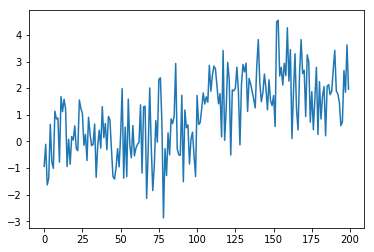

In [2]:
theta = 100
X = np.hstack((
    np.random.normal(loc=0, scale=1, size=theta),
    np.random.normal(loc=2, scale=1, size=100))
)
plot(X)

Заготовка для класса, реализующего статистику для обнаружения разладки, представлена ниже. Вам необходимо расширять этот класс.

In [ ]:
class Stat(object):
    def __init__(self, threshold, direction="unknown", init_stat=0.0):
        self._direction = str(direction)
        self._threshold = float(threshold)
        self._stat = float(init_stat)
        self._alarm = self._stat / self._threshold
    
    @classmethod
    def from_config(cls, config):
        check_empty_config(config)
        return cls(threshold=1.0)
    
    @property
    def direction(self):
        return self._direction

    @property
    def stat(self):
        return self._stat
        
    @property
    def alarm(self):
        return self._alarm
        
    @property
    def threshold(self):
        return self._threshold
    
    @property
    def debug_output(self):
        return {self.__class__.__name__: self.alarm}
        
    def update(self, **kwargs):
        # Statistics may use any of the following kwargs:
        #   ts - timestamp for the value
        #   value - original value
        #   mean - current estimated mean
        #   std - current estimated std
        #   adjusted_value - usually (value - mean) / std
        # Statistics call this after updating '_stat'
        
        # Extract relevant kwargs
        value = kwargs.get('value', 0.0)
        mean = kwargs.get('mean', 0.0)
        std = kwargs.get('std', 1.0)
        adjusted_value = kwargs.get('adjusted_value', (value - mean) / max(std, 1e-6))
        
        if self._direction == "up":
            self._stat = max(0, self._stat + adjusted_value)
        elif self._direction == "down":
            self._stat = min(0, self._stat + adjusted_value)
        else:  # two-sided
            self._stat = abs(self._stat + adjusted_value)
    
        self._alarm = self._stat / self._threshold

**Задание 1.** Вычислите отношение правдоподобия для элемента выборки $X_i$. Реализуйте процедуру подсчета отношения правдоподобия для этого элемента выборки в предположении, что данные нормальны.

Для вычисления отношения правдоподобия элемента выборки $X_i$ в предположении, что данные имеют нормальное распределение, необходимо определить две гипотезы и вычислить отношение их правдоподобий. Предположим, что мы тестируем две гипотезы:

- **Нулевая гипотеза $H_0$**: $X_i \sim \mathcal{N}(\mu_0, \sigma^2)$, где $\mu_0$ — известное среднее, $\sigma^2$ — известная дисперсия.
- **Альтернативная гипотеза $H_1$**: $X_i \sim \mathcal{N}(\mu_1, \sigma^2)$, где $\mu_1$ — другое известное среднее, а дисперсия $\sigma^2$ та же.

Отношение правдоподобия для элемента $X_i$ определяется как:

$$
\Lambda(X_i) = \frac{L(X_i | H_1)}{L(X_i | H_0)} = \frac{f(X_i | \mu_1, \sigma^2)}{f(X_i | \mu_0, \sigma^2)},
$$

где $f(x | \mu, \sigma^2)$ — плотность нормального распределения:

$$
f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right).
$$

Для $X_i$, отношение правдоподобия:

$$
\Lambda(X_i) = \frac{\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(X_i - \mu_1)^2}{2\sigma^2}\right)}{\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(X_i - \mu_0)^2}{2\sigma^2}\right)}.
$$

Упрощаем:

$$
\Lambda(X_i) = \frac{\exp\left(-\frac{(X_i - \mu_1)^2}{2\sigma^2}\right)}{\exp\left(-\frac{(X_i - \mu_0)^2}{2\sigma^2}\right)} = \exp\left(\frac{(X_i - \mu_0)^2 - (X_i - \mu_1)^2}{2\sigma^2}\right).
$$

Разложим разность квадратов:

$$
(X_i - \mu_0)^2 - (X_i - \mu_1)^2 = (X_i - \mu_0 - X_i + \mu_1)(X_i - \mu_0 + X_i - \mu_1) = (\mu_1 - \mu_0)(2X_i - \mu_0 - \mu_1).
$$

Тогда:

$$
\Lambda(X_i) = \exp\left(\frac{(\mu_1 - \mu_0)(2X_i - \mu_0 - \mu_1)}{2\sigma^2}\right).
$$

Для реализации предположим, что $\mu_0$, $\mu_1$, и $\sigma^2$ известны (например, $\mu_0 = 0$, $\mu_1 = 1$, $\sigma^2 = 1$). Код будет вычислять $\Lambda(X_i)$ для заданного $X_i$.

In [ ]:
def likelihood_ratio(x, mu_0=0.0, mu_1=1.0, sigma=1.0):
    """
    Вычисляет отношение правдоподобия для элемента выборки x.
    
    Параметры:
    x (float): Значение элемента выборки.
    mu_0 (float): Среднее под H0 (по умолчанию 0.0).
    mu_1 (float): Среднее под H1 (по умолчанию 1.0).
    sigma (float): Стандартное отклонение (по умолчанию 1.0).
    
    Возвращает:
    float: Отношение правдоподобия Lambda(x).
    """
    exponent = ((mu_1 - mu_0) * (2 * x - mu_0 - mu_1)) / (2 * sigma**2)
    return np.exp(exponent)

In [ ]:
for x in X:
    lr = likelihood_ratio(x)
    print(f"Для x = {x:.2f}, отношение правдоподобия = {lr:.4f}")

**Задание 2.** Постройте статистику кумулятивных сумм для обнаружения разладки в среднем значении процесса $X_n$. В какой момент $\tau$ следует подавать сигнал тревоги об обнаружении разладки?

In [ ]:
def cusum(data, mu_0=0.0, mu_1=1.0, h=5.0):
    """
    Выполняет двухсторонний CUSUM для обнаружения разладки в среднем.
    
    Параметры:
    data (np.ndarray): Входные данные.
    mu_0 (float): Среднее до разладки.
    mu_1 (float): Среднее после разладки.
    h (float): Порог для сигнала тревоги.
    
    Возвращает:
    tau (int or None): Момент разладки (индекс) или None, если не обнаружена.
    s_plus (np.ndarray): Статистика CUSUM для положительного сдвига.
    s_minus (np.ndarray): Статистика CUSUM для отрицательного сдвига.
    """
    n = len(data)
    s_plus = np.zeros(n)
    s_minus = np.zeros(n)
    k = (mu_1 - mu_0) / 2  # Референсное значение
    
    for i in range(1, n):
        s_plus[i] = max(0, s_plus[i-1] + (data[i] - mu_0 - k))
        s_minus[i] = min(0, s_minus[i-1] + (data[i] - mu_0 + k))
        
        # Проверка на превышение порога
        if s_plus[i] >= h or -s_minus[i] >= h:
            return i, s_plus, s_minus
    
    return None, s_plus, s_minus

In [ ]:
# Применение CUSUM
mu_0, mu_1, sigma = 0.0, 1.0, 1.0
h = 5.0
tau, s_plus, s_minus = cusum(X, mu_0=mu_0, mu_1=mu_1, h=h)
timestamps = np.arange(len(X)-theta)

# Визуализация
plt.figure(figsize=(12, 8))

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(timestamps, X, label="Данные")
if tau is not None:
    plt.axvline(x=tau, color='g', linestyle='--', label=f"Обнаружена разладка (τ={tau})")
plt.axvline(x=theta, color='r', linestyle='--', label=f"Истинная разладка (θ={theta})")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title("Синтетические данные с разладкой")
plt.legend()

In [ ]:
# ПСтатистики CUSUM
plt.subplot(2, 1, 2)
plt.plot(timestamps, s_plus, label="S⁺ (положительный сдвиг)")
plt.plot(timestamps, -s_minus, label="−S⁻ (отрицательный сдвиг)")
plt.axhline(y=h, color='k', linestyle='--', label=f"Порог h={h}")
if tau is not None:
    plt.axvline(x=tau, color='g', linestyle='--', label=f"Обнаружена разладка (τ={tau})")
plt.xlabel("Время")
plt.ylabel("Статистика CUSUM")
plt.title("Статистики CUSUM")
plt.legend()
plt.tight_layout()

In [ ]:
if tau is not None:
    print(f"Сигнал тревоги подан в момент τ = {tau}")
else:
    print("Разладка не обнаружена.")

**Задание 3.** Проведите моделирование Монте-Карло для подсчета средней величины задержки в обнаружении разладки для заданных данных. 

_Подсказка:_ сгенерируйте $N$ независимых выборок, для каждой из них вычислите значения статистики кумулятивных сумм и момент подачи тревоги $\tau$. Полученные _задержки_ $\tau - \theta$ усредните.

In [ ]:
def cusum(data, mu_0=0.0, mu_1=1.0, h=5.0):
    """
    Выполняет двухсторонний CUSUM для обнаружения разладки в среднем.
    
    Параметры:
    data (np.ndarray): Входные данные.
    mu_0 (float): Среднее до разладки.
    mu_1 (float): Среднее после разладки.
    h (float): Порог для сигнала тревоги.
    
    Возвращает:
    tau (int or None): Момент разладки (индекс) или None, если не обнаружена.
    """
    n = len(data)
    s_plus = np.zeros(n)
    s_minus = np.zeros(n)
    k = (mu_1 - mu_0) / 2  # Референсное значение
    
    for i in range(1, n):
        s_plus[i] = max(0, s_plus[i-1] + (data[i] - mu_0 - k))
        s_minus[i] = min(0, s_minus[i-1] + (data[i] - mu_0 + k))
        
        if s_plus[i] >= h or -s_minus[i] >= h:
            return i
    
    return None

def monte_carlo_delay(n_simulations=1000, n=200, theta=100, mu_0=0.0, mu_1=1.0, sigma=1.0, h=5.0):
    """
    Проводит моделирование Монте-Карло для оценки средней задержки в обнаружении разладки.
    
    Параметры:
    n_simulations (int): Количество выборок.
    n (int): Длина каждой выборки.
    theta (int): Момент разладки.
    mu_0 (float): Среднее до разладки.
    mu_1 (float): Среднее после разладки.
    sigma (float): Стандартное отклонение.
    h (float): Порог CUSUM.
    
    Возвращает:
    delays (np.ndarray): Массив задержек (tau - theta).
    mean_delay (float): Средняя задержка.
    std_delay (float): Стандартное отклонение задержек.
    """
    delays = []
    
    for _ in range(n_simulations):
        data = np.concatenate([
            np.random.normal(mu_0, sigma, theta),
            np.random.normal(mu_1, sigma, n - theta)
        ])
        
        tau = cusum(data, mu_0=mu_0, mu_1=mu_1, h=h)
        
        # Проверка, обнаружена ли разладка и tau >= theta
        if tau is not None and tau >= theta:
            delay = tau - theta
            delays.append(delay)

        # # Генерация данных: все из N(mu_1, sigma^2), так как theta = 0
        #     np.random.normal(mu_0, sigma, theta),
        #     np.random.normal(mu_1, sigma, n - theta)
        #     data = np.random.normal(mu_1, sigma, n)
        # ])
            
        #     # Применение CUSUM
        #     tau = cusum(data, mu_0=mu_0, mu_1=mu_1, h=h)
            
        #     # Сохранение задержки (tau), если разладка обнаружена
        #     if tau is not None:
        #         delays.append(tau)
    
    delays = np.array(delays)
    mean_delay = np.mean(delays) if len(delays) > 0 else np.nan
    std_delay = np.std(delays) if len(delays) > 0 else np.nan
    
    return delays, mean_delay, std_delay

In [ ]:
n_simulations = 1000
n = 200
theta = 100
mu_0 = 0.0
mu_1 = 1.0
sigma = 1.0
h = 5.0

np.random.seed(42) 
delays, mean_delay, std_delay = monte_carlo_delay(n_simulations, n, theta, mu_0, mu_1, sigma, h)
print(f"Количество успешных обнаружений: {len(delays)} из {n_simulations}")
print(f"Средняя задержка: {mean_delay:.2f}")
print(f"Стандартное отклонение задержек: {std_delay:.2f}")


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(delays, bins=30, density=True, alpha=0.7, color='blue', label='Распределение задержек')
plt.axvline(mean_delay, color='red', linestyle='--', label=f'Средняя задержка = {mean_delay:.2f}')
plt.xlabel('Задержка (τ - θ)')
plt.ylabel('Плотность')
plt.title('Распределение задержек в обнаружении разладки (Монте-Карло)')
plt.legend()

**Задание 4.** Проведите моделирование Монте-Карло для подсчета зависимости средней величины задержки в обнаружении разладки, которая появляется в момент времени $\theta = 0$, от значения порога срабатывания $h$. Отобразите полученную зависимость.

_Подсказка:_ для нескольких значений порога срабатывания $h$ сгенерируйте $N$ независимых выборок из распределения _с разладкой_ $\mathrm{P}_{0}$, для каждой из них вычислите значения статистики кумулятивных сумм и момент подачи тревоги $\tau$. Полученные _задержки_ $\tau - \theta$ усредните.

In [ ]:
n_simulations = 1000
n = 200
theta = 0
mu_0 = 0.0
mu_1 = 1.0
sigma = 1.0
h_values = [1, 3, 5, 7, 10]

_, mean_delays, std_delays = monte_carlo_delay(h_values, n_simulations, n, mu_0, mu_1, sigma)
print("Зависимость средней задержки от порога h:")
for h, mean_delay, std_delay in zip(h_values, mean_delays, std_delays):
    print(f"h = {h:.1f}: Средняя задержка = {mean_delay:.2f}, Стандартное отклонение = {std_delay:.2f}")


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(h_values, mean_delays, marker='o', linestyle='-', color='blue', label='Средняя задержка')
plt.fill_between(h_values, mean_delays - std_delays, mean_delays + std_delays, 
                 color='blue', alpha=0.2, label='±1 Стандартное отклонение')
plt.xlabel('Порог срабатывания h')
plt.ylabel('Средняя задержка (τ)')
plt.title('Зависимость средней задержки от порога h (Монте-Карло)')
plt.grid(True)
plt.legend()
plt.savefig('delay_vs_threshold.png')
plt.close()

## Часть 2. Временные ряды с неизвестными характеристиками

В этой части задания вам необходимо разработать процедуру обнаружения разладки для данных, распределение которых вам неизвестно. Вам задан набор данных `seminar.train_data`. Процедура чтения реализована для вас.

In [43]:
from datasets import read_simple_dataset
from itertools import izip

In [44]:
with open('seminar.train_data') as f:
    data, changepoint, targets = read_simple_dataset(f, keep_target=True)

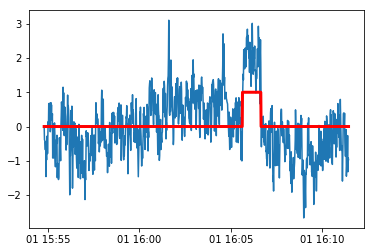

In [46]:
timestamps, values, changepoint = [], [], []
for (ts, value), cp_indicator in izip(data[1], targets[1]):
    timestamps.append(ts)
    values.append(value)
    changepoint.append(cp_indicator)
plot(timestamps, values)
plot(timestamps, changepoint, 'r', linewidth=3)

**Задание 1.** Модифицируйте процедуру кумулятивных сумм для случая, когда среднее значение временного ряда после разладки неизвестно.

In [ ]:
def modified_cusum(data, mu_0=0.0, sigma=1.0, h=5.0, window_size=20):
    """
    Модифицированный двухсторонний CUSUM для неизвестного среднего после разладки.
    
    Параметры:
    data (np.ndarray): Входные данные.
    mu_0 (float): Среднее до разладки.
    sigma (float): Стандартное отклонение.
    h (float): Порог для сигнала тревоги.
    window_size (int): Размер скользящего окна для оценки mu_1.
    
    Возвращает:
    tau (int or None): Момент разладки (индекс) или None, если не обнаружена.
    s_plus (np.ndarray): Статистика CUSUM для положительного сдвига.
    s_minus (np.ndarray): Статистика CUSUM для отрицательного сдвига.
    """
    n = len(data)
    s_plus = np.zeros(n)
    s_minus = np.zeros(n)
    mu_hat = np.zeros(n)  # Оценки mu_1
    
    for i in range(n):
        # Оценка mu_1 на основе скользящего окна
        if i < window_size:
            # Для первых window_size точек используем mu_0 или частичное окно
            mu_hat[i] = np.mean(data[:i+1]) if i > 0 else mu_0
        else:
            mu_hat[i] = np.mean(data[i-window_size+1:i+1])
        
        # Вычисление k на основе текущей оценки mu_1
        k = (mu_hat[i] - mu_0) / 2
        
        # Обновление статистик CUSUM
        if i > 0:
            s_plus[i] = max(0, s_plus[i-1] + (data[i] - mu_0 - k))
            s_minus[i] = min(0, s_minus[i-1] + (data[i] - mu_0 + k))
        
        # Проверка на превышение порога
        if i >= window_size and (s_plus[i] >= h or -s_minus[i] >= h):
            return i, s_plus, s_minus
    
    return None, s_plus, s_minus

In [ ]:
window_size = 20

tau, s_plus, s_minus = modified_cusum(data, mu_0=mu_0, sigma=sigma, h=h, window_size=window_size)

plt.figure(figsize=(12, 8))

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(timestamps, data, label="Данные")
if tau is not None:
    plt.axvline(x=tau, color='g', linestyle='--', label=f"Обнаружена разладка (τ={tau})")
plt.axvline(x=theta, color='r', linestyle='--', label=f"Истинная разладка (θ={theta})")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title("Синтетические данные с разладкой")
plt.legend()

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(timestamps, s_plus, label="S⁺ (положительный сдвиг)")
plt.plot(timestamps, -s_minus, label="−S⁻ (отрицательный сдвиг)")
plt.axhline(y=h, color='k', linestyle='--', label=f"Порог h={h}")
if tau is not None:
    plt.axvline(x=tau, color='g', linestyle='--', label=f"Обнаружена разладка (τ={tau})")
plt.xlabel("Время")
plt.ylabel("Статистика CUSUM")
plt.title("Модифицированные статистики CUSUM (неизвестное μ₁)")
plt.legend()

plt.tight_layout()
plt.savefig("modified_cusum.png")
plt.close()

In [ ]:
if tau is not None:
    print(f"Сигнал тревоги подан в момент τ = {tau}")
else:
    print("Разладка не обнаружена.")

**Задание 2.** Реализуйте процедуру оценивания среднего значения временного ряда с помощью скользящего среднего. Постройте статистику кумулятивных сумм для обнаружения разладки в среднем значении процесса $X_n$. В какой момент $\tau$ следует подавать сигнал тревоги об обнаружении разладки?

In [ ]:
def moving_average(data, window_size):
    """
    Вычисляет скользящее среднее для временного ряда.
    
    Параметры:
    data (np.ndarray): Входные данные.
    window_size (int): Размер окна.
    
    Возвращает:
    np.ndarray: Скользящее среднее для каждого момента времени.
    """
    n = len(data)
    ma = np.zeros(n)
    for i in range(n):
        if i < window_size:
            ma[i] = np.mean(data[:i+1])  # Используем все доступные данные
        else:
            ma[i] = np.mean(data[i-window_size+1:i+1])
    return ma

def cusum_with_moving_average(data, window_size=20, h=5.0, k=0.5):
    """
    CUSUM с использованием скользящего среднего для оценки mu_0.
    
    Параметры:
    data (np.ndarray): Входные данные.
    window_size (int): Размер окна для скользящего среднего.
    h (float): Порог для сигнала тревоги.
    k (float): Референсное значение (минимальный сдвиг).
    
    Возвращает:
    tau (int or None): Момент разладки (индекс) или None, если не обнаружена.
    s_plus (np.ndarray): Статистика CUSUM для положительного сдвига.
    s_minus (np.ndarray): Статистика CUSUM для отрицательного сдвига.
    mu_hat (np.ndarray): Оценки mu_0.
    """
    n = len(data)
    s_plus = np.zeros(n)
    s_minus = np.zeros(n)
    mu_hat = moving_average(data, window_size)  # Оценка mu_0
    
    for i in range(1, n):
        # Обновление статистик CUSUM с использованием mu_hat как mu_0
        s_plus[i] = max(0, s_plus[i-1] + (data[i] - mu_hat[i-1] - k))
        s_minus[i] = min(0, s_minus[i-1] + (data[i] - mu_hat[i-1] + k))
        
        # Проверка на превышение порога
        if i >= window_size and (s_plus[i] >= h or -s_minus[i] >= h):
            return i, s_plus, s_minus, mu_hat
    
    return None, s_plus, s_minus, mu_hat

In [ ]:
k = 0.5  # Минимальный сдвиг (mu_1 - mu_0 = 1)

tau, s_plus, s_minus, mu_hat = cusum_with_moving_average(data, window_size=window_size, h=h, k=k)
plt.figure(figsize=(12, 8))

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(timestamps, data, label="Данные")
plt.plot(timestamps, mu_hat, color='orange', label="Скользящее среднее")
if tau is not None:
    plt.axvline(x=tau, color='g', linestyle='--', label=f"Обнаружена разладка (τ={tau})")
plt.axvline(x=theta, color='r', linestyle='--', label=f"Истинная разладка (θ={theta})")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title("Данные и скользящее среднее")
plt.legend()

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(timestamps, s_plus, label="S⁺ (положительный сдвиг)")
plt.plot(timestamps, -s_minus, label="−S⁻ (отрицательный сдвиг)")
plt.axhline(y=h, color='k', linestyle='--', label=f"Порог h={h}")
if tau is not None:
    plt.axvline(x=tau, color='g', linestyle='--', label=f"Обнаружена разладка (τ={tau})")
plt.xlabel("Время")
plt.ylabel("Статистика CUSUM")
plt.title("Статистики CUSUM с скользящим средним")
plt.legend()

plt.tight_layout()
plt.savefig("cusum_with_moving_average.png")
plt.close()

In [ ]:
if tau is not None:
    print(f"Сигнал тревоги подан в момент τ = {tau}")
else:
    print("Разладка не обнаружена.")

**Задание 3.** Постройте статистику Ширяева-Робертса для обнаружения разладки в дисперсии временного ряда.

Данные $X_1, \ldots, X_n$ порождены нормальным $\mathcal{N}(0, \sigma^2_{\infty})$ распределением до момента появления разладки, и нормальным $\mathcal{N}(0, \sigma^2_{0})$ распределением после момента появления разладки. Момент разладки $\theta$ -- неизвестная величина.

**Статистика Ширяева-Робертса**:
   - Статистика SR предназначена для обнаружения изменений в распределении, основываясь на предположении, что разладка может произойти в любой момент $k = 1, 2, \dots, n$.
   - Для каждого наблюдения $X_n$, статистика SR $R_n$ вычисляется как сумма отношений правдоподобия для всех возможных моментов разладки:
     $$
     R_n = \sum_{k=1}^n \prod_{i=k}^n \frac{f(X_i | \sigma_0^2)}{f(X_i | \sigma_\infty^2)},
     $$
     где $f(X_i | \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{X_i^2}{2\sigma^2}\right)$ — плотность нормального распределения $\mathcal{N}(0, \sigma^2)$.
   - Отношение правдоподобия для наблюдения $X_i$:
     $$
     \frac{f(X_i | \sigma_0^2)}{f(X_i | \sigma_\infty^2)} = \frac{\frac{1}{\sqrt{2\pi \sigma_0^2}} \exp\left(-\frac{X_i^2}{2\sigma_0^2}\right)}{\frac{1}{\sqrt{2\pi \sigma_\infty^2}} \exp\left(-\frac{X_i^2}{2\sigma_\infty^2}\right)} = \sqrt{\frac{\sigma_\infty^2}{\sigma_0^2}} \exp\left(\frac{X_i^2}{2} \left( \frac{1}{\sigma_\infty^2} - \frac{1}{\sigma_0^2} \right)\right).
     $$
   - Рекуррентная форма SR статистики:
     $$
     R_n = (1 + R_{n-1}) \cdot \frac{f(X_n | \sigma_0^2)}{f(X_n | \sigma_\infty^2)}, \quad R_0 = 0.
     $$
   - Сигнал тревоги подается в момент $\tau$, когда $R_n \geq h$, где $h$ — порог.

**Особенности**:
   - Если $\sigma_0^2 > \sigma_\infty^2$, дисперсия увеличивается после разладки, и статистика SR будет расти при больших значениях $X_n^2$.
   - Если $\sigma_0^2 < \sigma_\infty^2$, дисперсия уменьшается, и статистика реагирует на меньшие $X_n^2$.
   - Порог $h$ определяет чувствительность обнаружения.

**Функция `shiryaev_roberts`**:
   - Принимает данные, $\sigma_\infty$, $\sigma_0$, и порог $h$.
   - Вычисляет отношение правдоподобия для каждого $X_n$:
     $$
     \frac{f(X_n | \sigma_0^2)}{f(X_n | \sigma_\infty^2)} = \sqrt{\frac{\sigma_\infty^2}{\sigma_0^2}} \exp\left(\frac{X_n^2}{2} \left( \frac{1}{\sigma_\infty^2} - \frac{1}{\sigma_0^2} \right)\right).
     $$
   - Обновляет статистику $R_n$ рекуррентно: $R_n = (1 + R_{n-1}) \cdot \text{LR}_n$.
   - Возвращает $\tau$ (первый индекс, где $R_n \geq h$) и массив $R_n$.

In [ ]:
def shiryaev_roberts(data, sigma_inf=1.0, sigma_0=2.0, h=1000.0):
    """
    Статистика Ширяева-Робертса для обнаружения разладки в дисперсии.
    
    Параметры:
    data (np.ndarray): Входные данные.
    sigma_inf (float): Стандартное отклонение до разладки (sqrt(sigma_inf^2)).
    sigma_0 (float): Стандартное отклонение после разладки (sqrt(sigma_0^2)).
    h (float): Порог для сигнала тревоги.
    
    Возвращает:
    tau (int or None): Момент разладки (индекс) или None, если не обнаружена.
    R (np.ndarray): Статистика SR для каждого момента времени.
    """
    n = len(data)
    R = np.zeros(n)
    R[0] = 0
    
    # Квадраты дисперсий
    var_inf = sigma_inf**2
    var_0 = sigma_0**2
    
    for i in range(1, n):
        # Отношение правдоподобия
        lr = np.sqrt(var_inf / var_0) * np.exp(0.5 * data[i]**2 * (1/var_inf - 1/var_0))
        # Рекуррентное обновление R_n
        R[i] = (1 + R[i-1]) * lr
        
        # Проверка на превышение порога
        if R[i] >= h:
            return i, R
    
    return None, R

In [ ]:
sigma_inf = 1.0  # До разладки
sigma_0 = 2.0   # После разладки

data = np.concatenate([
    np.random.normal(0, sigma_inf, theta),
    np.random.normal(0, sigma_0, n - theta)
])
timestamps = np.arange(n)

tau, R = shiryaev_roberts(data, sigma_inf=sigma_inf, sigma_0=sigma_0, h=h)
plt.figure(figsize=(12, 8))

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(timestamps, data, label="Данные")
if tau is not None:
    plt.axvline(x=tau, color='g', linestyle='--', label=f"Обнаружена разладка (τ={tau})")
plt.axvline(x=theta, color='r', linestyle='--', label=f"Истинная разладка (θ={theta})")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title("Синтетические данные с разладкой в дисперсии")
plt.legend()

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(timestamps, R, label="Статистика Ширяева-Робертса")
plt.axhline(y=h, color='k', linestyle='--', label=f"Порог h={h}")
if tau is not None:
    plt.axvline(x=tau, color='g', linestyle='--', label=f"Обнаружена разладка (τ={tau})")
plt.xlabel("Время")
plt.ylabel("R_n")
plt.title("Статистика Ширяева-Робертса")
plt.legend()

plt.tight_layout()
plt.savefig("shiryaev_roberts_variance.png")
plt.close()

In [ ]:
if tau is not None:
    print(f"Сигнал тревоги подан в момент τ = {tau}")
else:
    print("Разладка не обнаружена.")

**Задание 4.** Модифицируйте процедуру обнаружения разладки с помощью статистики Ширяева-Робертса для обнаружения разладки в дисперсии временного ряда, заданного данными из файлов. Подсказка: постройте вначале процедуру оценивания значения дисперсии до момента разладки, а затем воспользуйтесь идеей из Задания 1.

In [14]:
with open('seminar_var.train_data') as f:
    data_var, changepoint_var, targets_var = read_simple_dataset(f, keep_target=True)

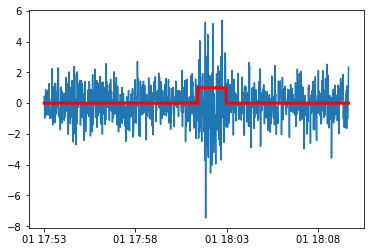

In [15]:
timestamps, values, changepoint = [], [], []
for (ts, value), cp_indicator in izip(data_var[0], targets_var[0]):
    timestamps.append(ts)
    values.append(value)
    changepoint.append(cp_indicator)
plot(timestamps, values)
plot(timestamps, changepoint, 'r', linewidth=3)

В Задании 1 для неизвестного среднего после разладки ($\mu_1$) использовалось скользящее окно для оценки $\mu_1$. Здесь мы аналогично оцениваем $\sigma_0^2$ через скользящее окно, чтобы адаптировать SR к неизвестной дисперсии после разладки.

**Функция `modified_shiryaev_roberts`**:
   - Оценивает $\sigma_\infty^2$ по первым $initial\_samples = 50$ наблюдениям.
   - Оценивает $\sigma_0^2$ на каждом шаге через скользящее окно размера $window\_size = 20$:
     $$
     \hat{\sigma}_{0,n}^2 = \frac{1}{window\_size}\sum_{i=n-window\_size+1}^n X_i^2
     $$
   - Вычисляет отношение правдоподобия, используя оценки дисперсий:
     $$
     \frac{f(X_n | \hat{\sigma}_{0,n}^2)}{f(X_n | \hat{\sigma}_\infty^2)} = \sqrt{\frac{\hat{\sigma}_\infty^2}{\hat{\sigma}_{0,n}^2}} \exp\left(\frac{X_n^2}{2} \left( \frac{1}{\hat{\sigma}_\infty^2} - \frac{1}{\hat{\sigma}_{0,n}^2} \right)\right).
     $$
   - Обновляет статистику $R_n$ рекуррентно:
     $$
     R_n = (1 + R_{n-1}) \cdot \frac{f(X_n | \hat{\sigma}_{0,n}^2)}{f(X_n | \hat{\sigma}_\infty^2)}, \quad R_0 = 0.
     $$
   - Возвращает:
     - $\tau$ - первый индекс, где $R_n \geq h$
     - $R_n$ - массив значений статистики
     - $\hat{\sigma}_{0,n}^2$ - массив оценок дисперсии

In [ ]:
def estimate_variance(data, window_size, start_idx=0, end_idx=None):
    """
    Оценивает дисперсию по скользящему окну или для заданного диапазона.
    
    Параметры:
    data (np.ndarray): Входные данные.
    window_size (int): Размер окна (если end_idx=None).
    start_idx (int): Начальный индекс (для фиксированного диапазона).
    end_idx (int): Конечный индекс (для фиксированного диапазона).
    
    Возвращает:
    np.ndarray или float: Оценки дисперсии.
    """
    if end_idx is not None:
        # Оценка для фиксированного диапазона
        segment = data[start_idx:end_idx]
        mean = np.mean(segment)
        return np.var(segment, ddof=1) if len(segment) > 1 else 1.0
    
    # Скользящее окно
    n = len(data)
    variances = np.zeros(n)
    for i in range(n):
        if i < window_size:
            segment = data[:i+1]
        else:
            segment = data[i-window_size+1:i+1]
        mean = np.mean(segment)
        variances[i] = np.var(segment, ddof=1) if len(segment) > 1 else 1.0
    return variances

def modified_shiryaev_roberts(data, sigma_inf=None, window_size=20, h=1000.0, initial_samples=50):
    """
    Модифицированная статистика Ширяева-Робертса для неизвестной дисперсии после разладки.
    
    Параметры:
    data (np.ndarray): Входные данные.
    sigma_inf (float): Стандартное отклонение до разладки (если None, оценивается).
    window_size (int): Размер окна для оценки sigma_0^2.
    h (float): Порог для сигнала тревоги.
    initial_samples (int): Количество начальных наблюдений для оценки sigma_inf^2.
    
    Возвращает:
    tau (int or None): Момент разладки.
    R (np.ndarray): Статистика SR.
    var_0_hat (np.ndarray): Оценки sigma_0^2.
    """
    n = len(data)
    R = np.zeros(n)
    R[0] = 0
    
    # Оценка sigma_inf^2 из начальных initial_samples наблюдений
    if sigma_inf is None:
        var_inf = estimate_variance(data, window_size, start_idx=0, end_idx=initial_samples)
        sigma_inf = np.sqrt(var_inf) if var_inf > 0 else 1.0
    var_inf = sigma_inf**2
    
    # Оценка sigma_0^2 по скользящему окну
    var_0_hat = estimate_variance(data, window_size)
    
    for i in range(1, n):
        # Отношение правдоподобия с оценками дисперсий
        var_0 = var_0_hat[i] if var_0_hat[i] > 0 else 1.0  # Избегаем деления на 0
        lr = np.sqrt(var_inf / var_0) * np.exp(0.5 * data[i]**2 * (1/var_inf - 1/var_0))
        # Рекуррентное обновление R_n
        R[i] = (1 + R[i-1]) * lr
        
        # Проверка на превышение порога
        if i >= window_size and R[i] >= h:
            return i, R, var_0_hat
    
    return None, R, var_0_hat

In [ ]:
initial_samples = 50

tau, R, var_0_hat = modified_shiryaev_roberts(
    data, sigma_inf=None, window_size=window_size, h=h, initial_samples=initial_samples
)
plt.figure(figsize=(12, 8))

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(timestamps, data, label="Данные")
plt.plot(timestamps, changepoint, 'r', linewidth=3, label="Истинная разладка")
if tau is not None:
    plt.axvline(x=tau, color='g', linestyle='--', label=f"Обнаружена разладка (τ={tau})")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title("Данные с разладкой в дисперсии")
plt.legend()

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(timestamps, R, label="Статистика Ширяева-Робертса")
plt.axhline(y=h, color='k', linestyle='--', label=f"Порог h={h}")
if tau is not None:
    plt.axvline(x=tau, color='g', linestyle='--', label=f"Обнаружена разладка (τ={tau})")
plt.xlabel("Время")
plt.ylabel("R_n")
plt.title("Модифицированная статистика Ширяева-Робертса")
plt.legend()
plt.tight_layout()


In [ ]:
if tau is not None:
    print(f"Сигнал тревоги подан в момент τ = {tau}")
else:
    print("Разладка не обнаружена.")